In [2]:
#Importar librerías
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

#Conectar con los datos

# Definir la ruta de la carpeta donde están los archivos CSV
carpeta_csv = 'C:/Users/Administrator/Desktop/Proyecto(Kaggle)_Aprendizaje supervisado,Clasificación/RetoSpaceshipTitanic/Data'

# Crear una lista para almacenar los DataFrames
dataframes = []

# Recorrer todos los archivos en la carpeta
for archivo in os.listdir(carpeta_csv):
    # Verificar que el archivo es un CSV
    if archivo.endswith(".csv"):
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(carpeta_csv, archivo)
        
        # Cargar el archivo CSV y añadirlo a la lista
        df = pd.read_csv(ruta_completa)
        dataframes.append(df)

# Verificar cuántos DataFrames fueron cargados
print(f"Se cargaron {len(dataframes)} archivos CSV.")


Se cargaron 3 archivos CSV.


In [3]:
# Acceder a los DataFrames por índice
df_submission = dataframes[0]  # Primer archivo (formato de predicciones)
df_new_data = dataframes[1]   # Segundo archivo (test)
df = dataframes[2]  # Tercer archivo (entrenamiento)


In [4]:
# Mostrar el tamaño de los DataFrames
print(df.shape)

# Obtener una descripción general de los datos (tipos de datos, valores nulos, etc.)
print(df.info())

(8693, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [5]:
# Resumen estadístico de variables numéricas
print(df.describe())


               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


In [6]:
# Comprobar valores nulos
print('Valores nulos en df:\n',df.isnull().sum())


Valores nulos en df:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [7]:
# Comprobar filas duplicadas
print('Valores filas duplicadas en df:\n',df.duplicated().sum())


Valores filas duplicadas en df:
 0


In [8]:
# Ver la frecuencia de las categorías
for col in df.select_dtypes(include='object').columns:
    print(f"Frecuencia de la columna en df:{col}:")
    print(df[col].value_counts())


Frecuencia de la columna en df:PassengerId:
PassengerId
9280_02    1
0001_01    1
0002_01    1
0003_01    1
0003_02    1
          ..
0008_01    1
0007_01    1
0006_02    1
0006_01    1
0005_01    1
Name: count, Length: 8693, dtype: int64
Frecuencia de la columna en df:HomePlanet:
HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64
Frecuencia de la columna en df:CryoSleep:
CryoSleep
False    5439
True     3037
Name: count, dtype: int64
Frecuencia de la columna en df:Cabin:
Cabin
G/734/S     8
F/1194/P    7
B/201/P     7
G/981/S     7
G/109/P     7
           ..
E/56/P      1
A/98/P      1
G/1499/S    1
G/1500/S    1
D/252/P     1
Name: count, Length: 6560, dtype: int64
Frecuencia de la columna en df:Destination:
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64
Frecuencia de la columna en df:VIP:
VIP
False    8291
True      199
Name: count, dtype: int64
Frecuencia de la columna en df:Name:
Name
Anton Wo

In [9]:
# Convertir las columnas categóricas a variables dummy (One-Hot Encoding)
df_encoded = pd.get_dummies(df)

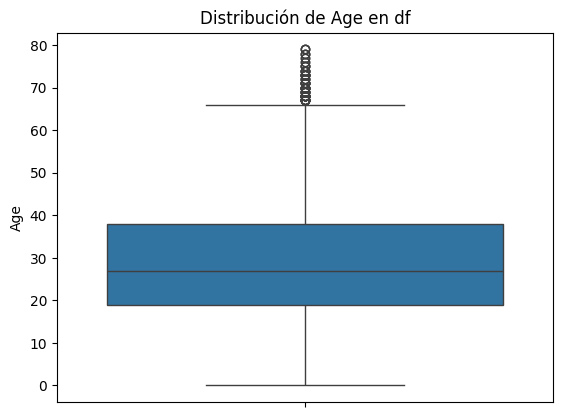

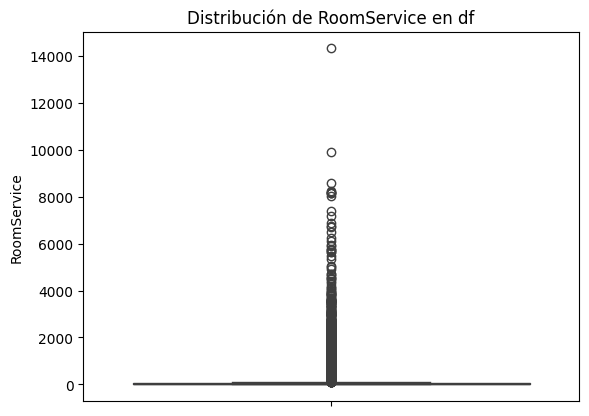

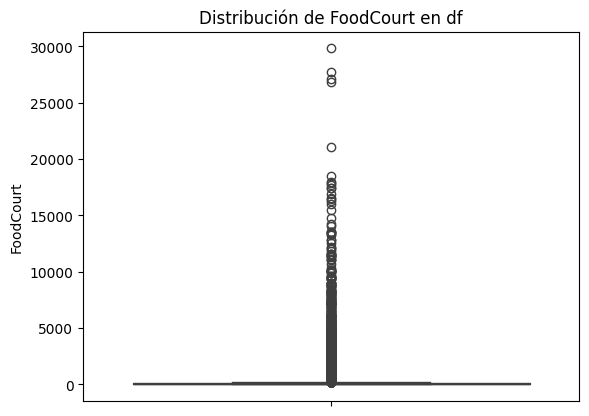

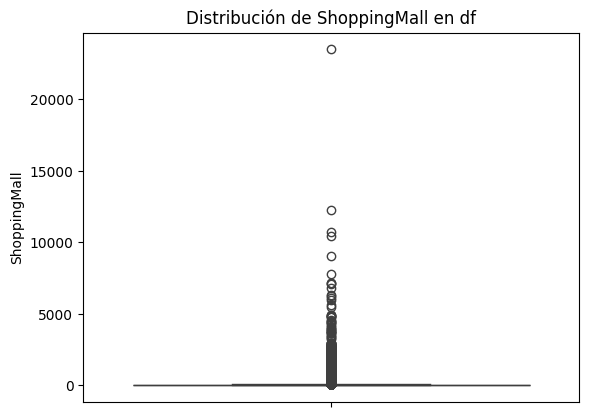

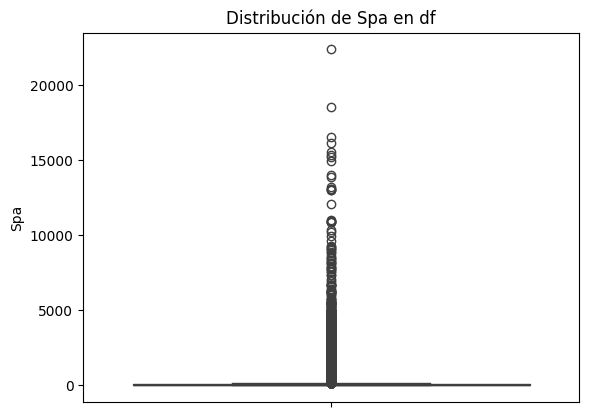

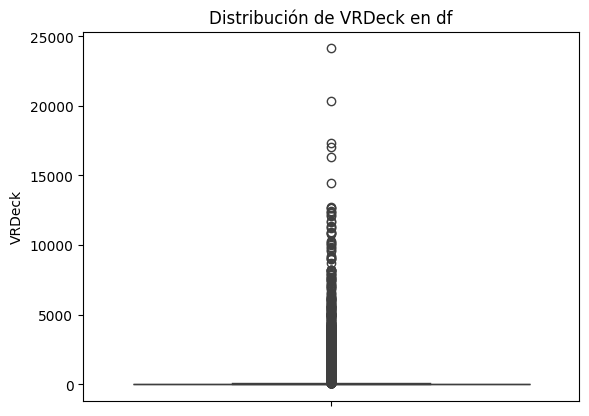

In [10]:
# Graficar distribuciones y detectar outliers
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(df[col])
    plt.title(f"Distribución de {col} en df")
    plt.show()
